In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
sns.set()

In [2]:
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

In [3]:
print(f"Books:{books.shape}")
print(f"Users:{users.shape}")
print(f"Ratings:{ratings.shape}")

Books:(271360, 8)
Users:(278858, 3)
Ratings:(1149780, 3)


## Books

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
books["Book-Title"].value_counts().reset_index()

,index,Book-Title
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,The Secret Garden,20
4,Dracula,20
...,...,...
242130,What Every Kid Should Know,1
242131,The Seventh Enemy (A Brady Coyne Mystery),1
242132,A Brace of Skeet,1
242133,"The Yellow Admiral (O'Brian, Patrick, Aubrey/M...",1


In [7]:
books["Year-Of-Publication"].value_counts().reset_index()

,index,Year-Of-Publication
0,2002,13903
1,2001,13715
2,1999,13414
3,2000,13373
4,1998,12116
...,...,...
197,1924,1
198,2012,1
199,1927,1
200,1931,1


## Users

In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
users["User-ID"].value_counts().reset_index()

,index,User-ID
0,1,1
1,185904,1
2,185910,1
3,185909,1
4,185908,1
...,...,...
278853,92959,1
278854,92960,1
278855,92961,1
278856,92962,1


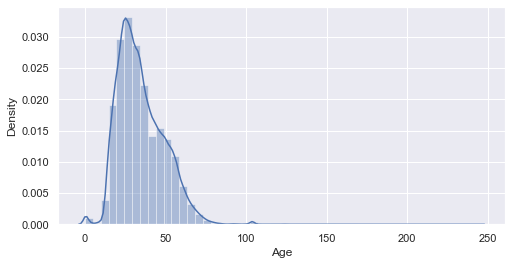

In [10]:
plt.figure(figsize=(8,4))
sns.distplot(users["Age"])
plt.show()

## Ratings

In [11]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


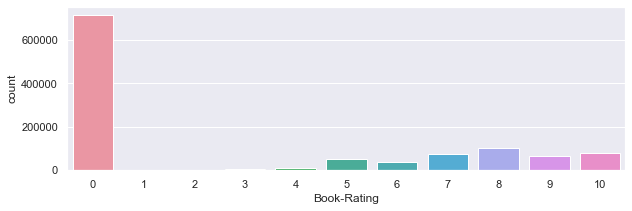

In [12]:
plt.figure(figsize=(10,3))
sns.countplot(ratings["Book-Rating"])
plt.show()

# 1. Top 50 Books (Popularity Based)

__Merging books with ratings__

In [13]:
ratings_names = ratings.merge(books, on = "ISBN")

In [14]:
ratings_names.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


1. __Average Rating Descending__ 
2. __Minimum number of ratings = 250__

In [15]:
num_ratings = ratings_names.groupby("Book-Title").count()["Book-Rating"].reset_index()
num_ratings.rename(columns={"Book-Rating" : "Num_of_rating"}, inplace=True)
num_ratings.head()

,Book-Title,Num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [25]:
average_ratings = ratings_names.groupby("Book-Title").mean().reset_index()
average_ratings.rename(columns={"Book-Rating" : "Average_rating"}, inplace=True)
average_ratings.head()

,Book-Title,User-ID,Average_rating
0,A Light in the Storm: The Civil War Diary of ...,51807.25,2.25
1,Always Have Popsicles,172742.00,0.00
2,Apple Magic (The Collector's series),198711.00,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",269557.00,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,11601.00,0.00


__Merging two dataframes num_ratings and average_ratings w.r.t "Book-Title"__

In [26]:
num_average = num_ratings.merge(average_ratings, on = "Book-Title")

In [27]:
top_50_books = num_average.loc[num_average["Num_of_rating"] >= 250].sort_values(by = "Num_of_rating", ascending=False).head(50)

In [28]:
top_50_books.head()

,Book-Title,Num_of_rating,User-ID,Average_rating
234951,Wild Animus,2502,140706.721423,1.019584
196326,The Lovely Bones: A Novel,1295,140728.515830,4.468726
183573,The Da Vinci Code,898,136996.018931,4.642539
5303,A Painted House,838,139631.794749,3.231504
199237,The Nanny Diaries: A Novel,828,137788.809179,3.530193


__Fetching and merging other columns like image, authors, etc..__

In [29]:
top_50_books = top_50_books.merge(books, on = "Book-Title").drop_duplicates("Book-Title")

In [30]:
top_50_books.shape

(50, 11)

# 2. Collaborative Filtering

1. __User rating should be >=200 (arbitrary assumption)__
2. __Book must have >=50 user ratings(arbitrary assumption)__

In [ ]:
user_rating         = ratings_names.groupby("User-ID").count()["Book-Rating"].reset_index()
user_rating_gte_200 = user_rating.loc[user_rating["Book-Rating"] >= 200]

In [ ]:
user_rating_gte_200.head()

In [ ]:
user_gte_index = user_rating_gte_200["User-ID"].values

In [ ]:
filtered_user_ratings = ratings_names[ratings_names["User-ID"].isin(user_gte_index)]

In [ ]:
filtered_user_ratings.head(2)

In [ ]:
book_rating        = filtered_user_ratings.groupby("Book-Title").count()["Book-Rating"].reset_index()
book_rating_gte_50 = book_rating.loc[book_rating["Book-Rating"] >= 50]

In [ ]:
book_rating_gte_50.head()

In [ ]:
book_gte_index = book_rating_gte_50["Book-Title"].values

In [ ]:
filtered_user_book_ratings = filtered_user_ratings[filtered_user_ratings["Book-Title"].isin(book_gte_index)]

In [ ]:
filtered_user_book_ratings.head()

__Creating Pivot Table for the user, books and the ratings__

In [ ]:
final_filtered_table = filtered_user_book_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

In [ ]:
final_filtered_table.fillna(0, inplace=True)

__Finding the cosine similarity between the all the books(Distances)__

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_score = cosine_similarity(final_filtered_table)

In [ ]:
similarity_score

In [ ]:
# filtered_user_book_ratings["Book-Title"].apply(lambda x: x.lower()).apply(lambda x: x.upper())

## Defining a function "Recommend" 

In [ ]:
def Recommend(title):
    
    if title in final_filtered_table.index:
    
        book_index = np.where(final_filtered_table.index == title)[0][0]
        # 5 recommendations:
        rec_books = sorted(list(enumerate(similarity_score[book_index])), key = lambda x : x[1], reverse = True)[1:5]
        data = []
        for x in rec_books:
            items   = []
            temp_df = books[books["Book-Title"] == final_filtered_table.index[x[0]]]
            items.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
            items.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
            items.extend(list(temp_df.drop_duplicates("Book-Title")["Image-URL-M"].values))
            data.append(items)
        return data
    else:
        print("No Related Books Found")

In [ ]:
Recommend("1984")

In [ ]:
# top_50_books["Book-Title"].values
title = list(top_50_books["Book-Title"].values)
author = list(top_50_books["Book-Author"].values)
votes = list(top_50_books["Num_of_rating"].values)
image_url = list(top_50_books["Image-URL-L"].values)
my_dict = {
    "book_title" : title,
    "author"     : author,
    "votes"      : votes,
    "image_url"  : image_url,
}

In [37]:
# top_50_books["Num_of_rating"].apply(lambda x : np.float16(x))
# top_50_books["Num_of_rating"]
top_50_books["Image-URL-L"].iloc[0]

'http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg'

### Exporting some models

In [31]:
import pickle

pickle.dump(top_50_books, open("top_50.pkl", "wb"))
# pickle.dump(final_filtered_table, open("final_filtered.pkl", "wb"))
# pickle.dump(similarity_score, open("sim_scores.pkl", "wb"))
# pickle.dump(books, open("books_df.pkl", "wb"))

In [38]:
string = "Wild Animus"
len(string)

11

In [1]:
import pickle

final_filtered = pickle.load(open("final_filtered.pkl", "rb"))
books_df = pickle.load(open("books_df.pkl", "rb"))
similarity_scores = pickle.load(open("sim_scores.pkl", "rb"))

In [15]:
def Recommend_book(title):
    status = True
    if title in final_filtered.index:
    
        book_index = np.where(final_filtered.index == title)[0][0]
        # 5 recommendations:
        rec_books = sorted(list(enumerate(similarity_scores[book_index])), key = lambda x : x[1], reverse = True)[1:5]
        data = []
        for x in rec_books:
            items   = []
            temp_df = books_df[books_df["Book-Title"] == final_filtered.index[x[0]]]
            items.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
            items.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
            items.extend(list(temp_df.drop_duplicates("Book-Title")["Image-URL-M"].values))
            data.append(items)
        return data
    else:
        status = False
        return status

In [17]:
Recommend_book("Harry")

False

In [22]:
def test():
    data_1 = Recommend_book("yggh")
    if data_1 == False:
        print("False return")
    else:
        print(data_1)


In [23]:
test()

False return
